#  <font color='blue'>Data Science Academy </font>

# <font color='blue'>Big Data Real-time Analytics com Python e Spark </font>

## Visualização de graficos

Configuraçãoo e customização do metplotlib



In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib
%matplotlib inline

In [ ]:
print(plt.style.available)

In [ ]:
def criar_plot():
    x = np.random.randn(5000,6)
    (figure, axes) = plt.subplots(figsize = (16,10))
    (n, bins, patches) = axes.hist(x, 12,
                                  density=1,
                                  histtype='bar',
                                  label=['Color 1','Color 2','Color 3','Color 4','Color 5','Color 6'])
    axes.set_title("Histograma\nPara\nDistribuição Normal", fontsize=25)
    axes.set_xlabel("Dados", fontsize=16)
    axes.set_ylabel("Frequencia", fontsize=16)
    axes.legend()
    plt.show()

In [ ]:
criar_plot()

In [ ]:
!ls -l ../3-Arquivos-Cap02/8-Arquivos-Cap03/estilos/

In [10]:
#usando estilo predefinido
plt.style.use('../3-Arquivos-Cap02/8-Arquivos-Cap03/estilos/personalestilo-1.mplstyle')

In [ ]:
criar_plot()

## Usando Pandas par carregar dados

In [2]:
import sys
sys.path.append('../3-Arquivos-Cap02/8-Arquivos-Cap03/lib/')
import geradados, geraplot, radar

In [ ]:
dados = geradados.get_raw_data('../3-Arquivos-Cap02/8-Arquivos-Cap03/data','carros.csv')

In [ ]:
dados.head(10)

In [ ]:
dados_subset = geradados.get_limited_data('../3-Arquivos-Cap02/8-Arquivos-Cap03/data','carros.csv')

In [ ]:
dados_subset.head(10)

In [ ]:
# normalizando dados
dados_normalizados = dados.copy()

In [ ]:
 geradados.norm_columns(['city mpg','highway mpg', 'horsepower'],dados_normalizados)
dados_normalizados.head()

In [ ]:
 geradados.invert_norm_columns(['city mpg','highway mpg', 'horsepower'],dados_normalizados)
dados_normalizados.head()

## Plots

In [ ]:
figure = plt.figure(figsize=(15,5))
prices_gs = mpl.gridspec.GridSpec(1,1)
prices_axes = geraplot.make_autos_price_plot(figure, prices_gs, dados)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15,5))
prices_gs = mpl.gridspec.GridSpec(1,1)
prices_axes = geraplot.make_autos_mpg_plot(figure, prices_gs, dados)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15,5))
prices_gs = mpl.gridspec.GridSpec(1,1)
prices_axes = geraplot.make_autos_riskiness_plot(figure, prices_gs, dados)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15,5))
prices_gs = mpl.gridspec.GridSpec(1,1)
prices_axes = geraplot.make_autos_losses_plot(figure, prices_gs, dados)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15,5))
prices_gs = mpl.gridspec.GridSpec(1,1)
prices_axes = geraplot.make_autos_loss_and_risk_plot(figure, prices_gs, dados)
plt.show()

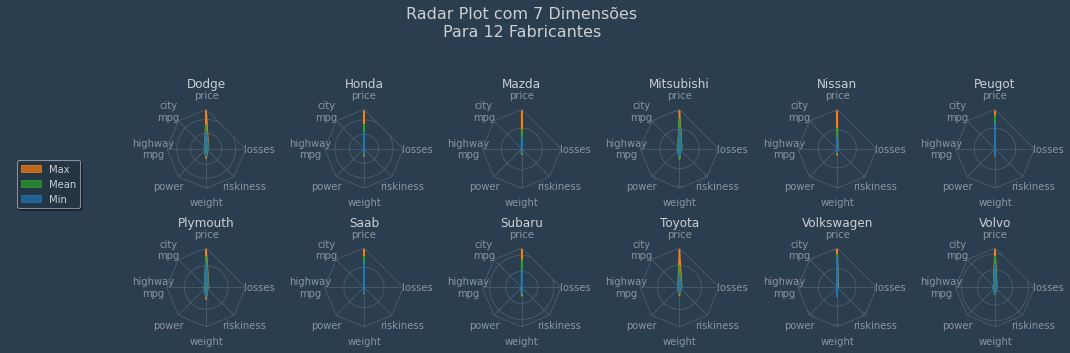

In [18]:
dados = geradados.get_limited_data(path='../3-Arquivos-Cap02/8-Arquivos-Cap03/data',name='carros.csv', lower_bound=6)
dados_normalizados = dados.copy()
dados_normalizados.rename(columns= {'horsepower':'power'}, inplace = True)
figure = plt.figure(figsize=(15,5))

radar_gs = mpl.gridspec.GridSpec(3,7,
                                height_ratios = [1,10,10],
                                wspace=0.50,
                                hspace=0.60,
                                top=0.95,
                                bottom=0.25)
radar_axes = geraplot.make_autos_radar_plot(figure, gs=radar_gs,pddata=dados_normalizados)
plt.show()

## Criando plots combinados (dashboards)

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (13).

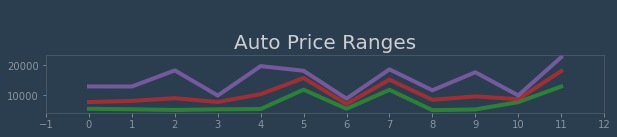

In [26]:
#construindo as camadas sem os dados
figure = plt.figure(figsize=(10,8))
gs_master = mpl.gridspec.GridSpec(4,2, height_ratios=[1,2,8,2])

# Camada 1 title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[0,:])
title_axes = figure.add_subplot(gs_1[0])
geraplot.hide_axes(title_axes)

# Camada 2 price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[1,:])
price_axes = figure.add_subplot(gs_2[0])
geraplot.make_autos_price_plot(figure, pddata=dados, axes = price_axes)

    
# camada 3 risk e radar
# Camada 1 title
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2,2, 
                                             height_ratios=[2,1],
                                             hspace=0.4,
                                             subplot_spec=gs_master[2,:1])
risk_and_loss_axes = figure.add_subplot(gs_31[0,:])
geraplot.make_autos_loss_and_risk_plot(figure,
                                      pddata=dados_normalizados,
                                      axes=risk_and_loss_axes,
                                      x_label=False,
                                      rotate_ticks=True)
risk_axes = figure.add_subplot(gs_31[1,:1])
geraplot.make_autos_riskiness_plot(figure,
                                  pddata=dados_normalizados,
                                  axes=risk_axes,
                                  legend=False,
                                  labels=False)

loss_axes = figure.add_subplot(gs_31[1:,1])
geraplot.make_autos_losses_plot(figure,
                               pddata=dados_normalizados,
                               axes=loss_axes,
                               legend=False,
                                  labels=False)

gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[2,1])
radar_axes = figure.add_subplot(gs_32[0])
(row, cols) = geometry = gs_32.get_geometry()
title_axes = figure.add_subplot(gs_32[0,:])
inner_axex = []
projection = radar.RadarAxes(spoke_count=len(dados_normalizados.groupby('make').mean().columns))
[inner_axex.append(figure.add_subplot(m, projection = projection)) for m in [n for n in gs_32][cols:]]
geraplot.make_autos_radar_plot(figure, pddata=dados_normalizados,
                              title_axes=title_axes,
                              inner_axex = inner_axex,
                              legend_axes=False,
                              geometry=geometry)

# camada 3 MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[3,:])
mpg_axes = figure.add_subplot(gs_4[0])
geraplot.make_autos_mpg_plot(figure,
                            pddata=dados,
                            axes=mpg_axes)

# une as camadas ainda sem dados
gs_master.tight_layout(figure)
plt.show()